# **Exploratory Data Analysis**

## **Import necessary libraries**

In [1]:
import os
import sys
# cwd = "/".join(os.getcwd().split("\\")[:-1])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

## **Data Loading & Quality Assessment**

### **Data Loading**

#### **Events data**

In [2]:
events = pd.read_csv(f'../dataset/events.csv')

In [3]:
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms', utc=True)
events['date'] = events['datetime'].dt.date
events['hour'] = events['datetime'].dt.hour
events['day_of_week'] = events['datetime'].dt.day_name()

In [4]:
print("=" * 50)
print("EVENTS DATA OVERVIEW")
print("=" * 50)
print(events.head(3))
print(events.tail(3))
print(f"Shape: {events.shape}")
print(f"\nData Types:\n{events.dtypes}")

EVENTS DATA OVERVIEW
       timestamp  visitorid event  itemid  transactionid  \
0  1433221332117     257597  view  355908            NaN   
1  1433224214164     992329  view  248676            NaN   
2  1433221999827     111016  view  318965            NaN   

                          datetime        date  hour day_of_week  
0 2015-06-02 05:02:12.117000+00:00  2015-06-02     5     Tuesday  
1 2015-06-02 05:50:14.164000+00:00  2015-06-02     5     Tuesday  
2 2015-06-02 05:13:19.827000+00:00  2015-06-02     5     Tuesday  
             timestamp  visitorid event  itemid  transactionid  \
2756098  1438397820527    1251746  view   78144            NaN   
2756099  1438398530703    1184451  view  283392            NaN   
2756100  1438400163914     199536  view  152913            NaN   

                                datetime        date  hour day_of_week  
2756098 2015-08-01 02:57:00.527000+00:00  2015-08-01     2    Saturday  
2756099 2015-08-01 03:08:50.703000+00:00  2015-08-01     3 

#### **Item properties**

In [5]:
# item_properties_1 = pd.read_csv(f'../dataset/item_properties_part1.csv')
# item_properties_2 = pd.read_csv(f'../dataset/item_properties_part2.csv')
# item_properties = pd.concat([item_properties_1, item_properties_2], axis=0, ignore_index=True)

item_properties = pd.read_csv(f'../dataset/item_properties.csv')


In [6]:
item_properties['datetime'] = pd.to_datetime(item_properties['timestamp'], unit='ms', utc=True)
item_properties['date'] = item_properties['datetime'].dt.date
item_properties['hour'] = item_properties['datetime'].dt.hour
item_properties['day_of_week'] = item_properties['datetime'].dt.day_name()

In [7]:
print("=" * 50)
print("ITEM PROPERTIES OVERVIEW")
print("=" * 50)
print(item_properties.head(3))
print(item_properties.tail(3))
print(f"Shape: {item_properties.shape}")
print(f"\nData Types:\n{item_properties.dtypes}")

ITEM PROPERTIES OVERVIEW
       timestamp  itemid    property                            value  \
0  1435460400000  460429  categoryid                             1338   
1  1441508400000  206783         888          1116713 960601 n277.200   
2  1439089200000  395014         400  n552.000 639502 n720.000 424566   

                   datetime        date  hour day_of_week  
0 2015-06-28 03:00:00+00:00  2015-06-28     3      Sunday  
1 2015-09-06 03:00:00+00:00  2015-09-06     3      Sunday  
2 2015-08-09 03:00:00+00:00  2015-08-09     3      Sunday  
              timestamp  itemid property                             value  \
20275899  1439694000000  347565      686                            610834   
20275900  1433646000000  287231      867                            769062   
20275901  1442113200000  275768      888  888666 n10800.000 746840 1318567   

                          datetime        date  hour day_of_week  
20275899 2015-08-16 03:00:00+00:00  2015-08-16     3      Sund

#### **Category tree**

In [8]:
category_tree = pd.read_csv(f'../dataset/category_tree.csv')
print("=" * 50)
print("CATEGORY TREEOVERVIEW")
print("=" * 50)
print(category_tree.head(3))
print(category_tree.tail(3))
print(f"Shape: {category_tree.shape}")
print(f"\nData Types:\n{category_tree.dtypes}")

CATEGORY TREEOVERVIEW
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
      categoryid  parentid
1666        1336     745.0
1667         689     207.0
1668         761     395.0
Shape: (1669, 2)

Data Types:
categoryid      int64
parentid      float64
dtype: object


### **Data Quality Checks**

#### **Events data**

In [9]:
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

# Missing values
missing = events.isnull().sum()
missing_pct = (missing / len(events) * 100).round(2)
quality_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(f"\nMissing Values:\n{quality_df}")

# Unique counts
print(f"\nUnique Visitors: {events['visitorid'].nunique():,}")
print(f"Unique Items: {events['itemid'].nunique():,}")
print(f"Unique Transactions: {events['transactionid'].nunique():,}")
print(f"Date Range: {events['datetime'].min()} to {events['datetime'].max()}")

DATA QUALITY ASSESSMENT

Missing Values:
               Missing Count  Missing %
timestamp                  0       0.00
visitorid                  0       0.00
event                      0       0.00
itemid                     0       0.00
transactionid        2733644      99.19
datetime                   0       0.00
date                       0       0.00
hour                       0       0.00
day_of_week                0       0.00

Unique Visitors: 1,407,580
Unique Items: 235,061
Unique Transactions: 17,672
Date Range: 2015-05-03 03:00:04.384000+00:00 to 2015-09-18 02:59:47.788000+00:00


#### **Item properties**

In [10]:
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

# Missing values
missing = item_properties.isnull().sum()
missing_pct = (missing / len(item_properties) * 100).round(2)
quality_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(f"\nMissing Values:\n{quality_df}")

# Unique counts
print(f"Unique Items: {item_properties['itemid'].nunique():,}")
print(f"Unique Properties: {item_properties['property'].nunique():,}")
print(f"Date Range: {item_properties['datetime'].min()} to {item_properties['datetime'].max()}")

DATA QUALITY ASSESSMENT

Missing Values:
             Missing Count  Missing %
timestamp                0        0.0
itemid                   0        0.0
property                 0        0.0
value                    0        0.0
datetime                 0        0.0
date                     0        0.0
hour                     0        0.0
day_of_week              0        0.0
Unique Items: 417,053
Unique Properties: 1,104
Date Range: 2015-05-10 03:00:00+00:00 to 2015-09-13 03:00:00+00:00


#### **Category tree**

In [11]:
print("DATA QUALITY ASSESSMENT")
print("=" * 50)

# Missing values
missing = category_tree.isnull().sum()
missing_pct = (missing / len(category_tree) * 100).round(2)
quality_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(f"\nMissing Values:\n{quality_df}")

# Unique counts
print(f"Unique CategoryIDs: {category_tree['categoryid'].nunique():,}")
print(f"Unique ParentIDs: {category_tree['parentid'].nunique():,}")

DATA QUALITY ASSESSMENT

Missing Values:
            Missing Count  Missing %
categoryid              0        0.0
parentid               25        1.5
Unique CategoryIDs: 1,669
Unique ParentIDs: 362


### **Univariate Analysis**

#### **Event Type Distribution**

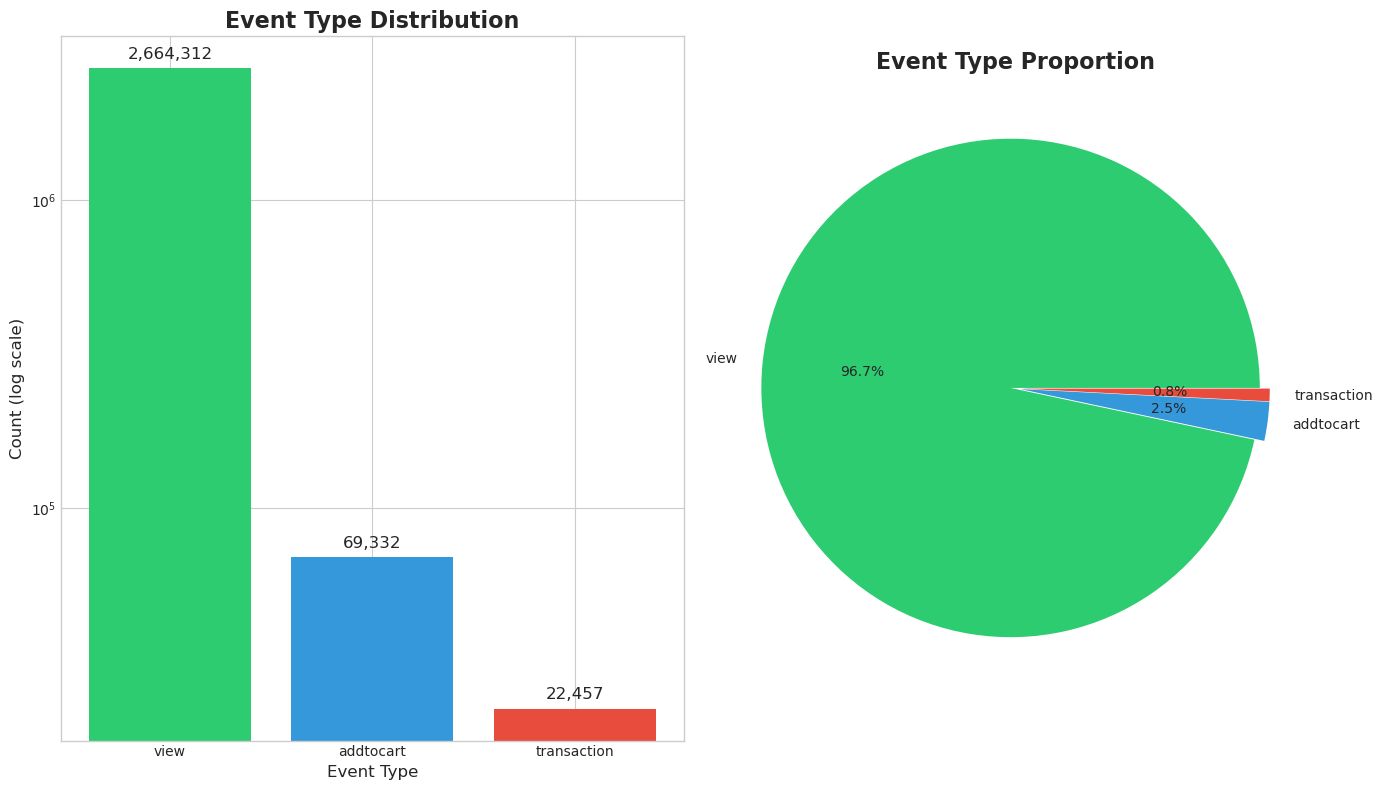


Event Breakdown:
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

Conversion Rates:
  View → Add to Cart: 2.60%
  Add to Cart → Transaction: 32.39%
  Overall (View → Transaction): 0.843%


In [12]:
# ============================================
# Event Type Distribution
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Count plot
event_counts = events['event'].value_counts()
colors = ['#2ecc71', '#3498db', '#e74c3c']
ax1 = axes[0]
bars = ax1.bar(event_counts.index, event_counts.values, color=colors, edgecolor=None)
ax1.set_yscale('log')
ax1.set_title('Event Type Distribution', fontsize=16, fontweight='bold')
ax1.set_xlabel('Event Type', fontsize=12)
ax1.set_ylabel('Count (log scale)', fontsize=12)
for bar, count in zip(bars, event_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.05, 
             f'{count:,}', ha='center', va='bottom', fontsize=12)

# Percentage pie
ax2 = axes[1]
ax2.pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%',
        colors=colors, explode=(0.02, 0.02, 0.02), shadow=False)
ax2.set_title('Event Type Proportion', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nEvent Breakdown:")
print(event_counts)
print(f"\nConversion Rates:")
print(f"  View → Add to Cart: {event_counts['addtocart']/event_counts['view']*100:.2f}%")
print(f"  Add to Cart → Transaction: {event_counts['transaction']/event_counts['addtocart']*100:.2f}%")
print(f"  Overall (View → Transaction): {event_counts['transaction']/event_counts['view']*100:.3f}%")

This barchart shows the natural funnel shape and class imbalance (views >> transactions)

#### **User Activity Distribution**

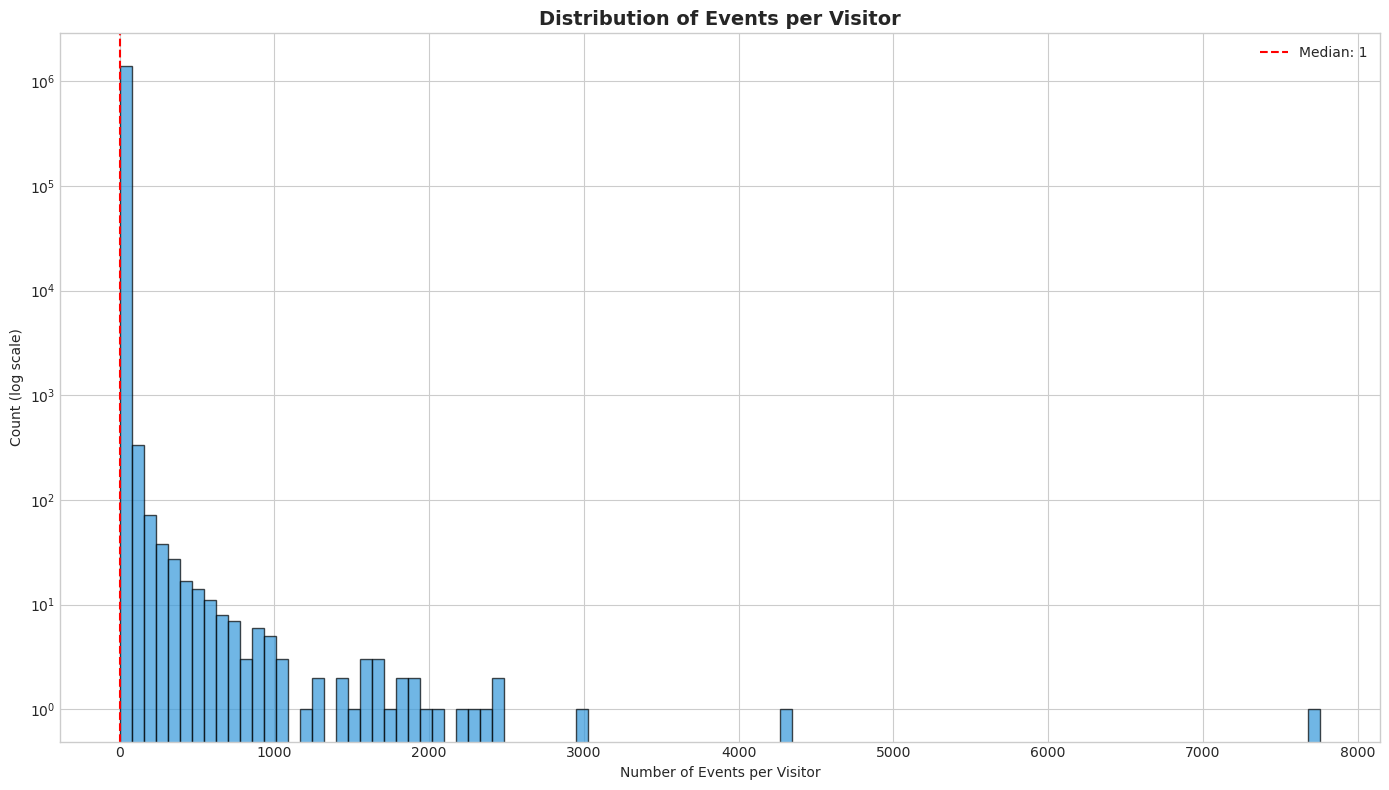


Visitor Activity Statistics:
count    1.407580e+06
mean     1.958042e+00
std      1.258049e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.757000e+03
Name: event_count, dtype: float64

Percentiles:
  50th percentile: 1 events
  75th percentile: 2 events
  90th percentile: 3 events
  95th percentile: 5 events
  99th percentile: 13 events


In [13]:
# ============================================
# Events per Visitor Distribution
# ============================================
visitor_events = events.groupby('visitorid').size().reset_index(name='event_count')

fig, ax = plt.subplots(figsize=(14, 8))

# Histogram (log scale needed due to heavy tail)
ax.hist(visitor_events['event_count'], bins=100, color='#3498db', edgecolor="black", alpha=0.7)
ax.set_yscale('log')
ax.set_xlabel('Number of Events per Visitor')
ax.set_ylabel('Count (log scale)')
ax.set_title('Distribution of Events per Visitor', fontsize=14, fontweight='bold')
ax.axvline(visitor_events['event_count'].median(), color='red', linestyle='--', 
            label=f"Median: {visitor_events['event_count'].median():.0f}")
ax.legend()

plt.tight_layout()
plt.show()

# Summary stats
print(f"\nVisitor Activity Statistics:")
print(visitor_events['event_count'].describe())
print(f"\nPercentiles:")
for p in [50, 75, 90, 95, 99]:
    print(f"  {p}th percentile: {visitor_events['event_count'].quantile(p/100):.0f} events")

### **Temporal Analysis**

#### **Weekly Event Trends**

In [ ]:
# ============================================
# Weekly Event Trends - Separate Figures
# ============================================
# Group events by week and event type
events['week'] = events['date'].apply(lambda d: pd.to_datetime(d) - pd.to_timedelta(pd.to_datetime(d).dayofweek, unit='d'))
weekly_events = events.groupby(['week', 'event']).size().unstack(fill_value=0)
weekly_events.index = pd.to_datetime(weekly_events.index)

event_order = ['view', 'addtocart', 'transaction']
event_colors = ['#2ecc71', '#3498db', '#e74c3c']
color_map = {e: c for e, c in zip(event_order, event_colors)}


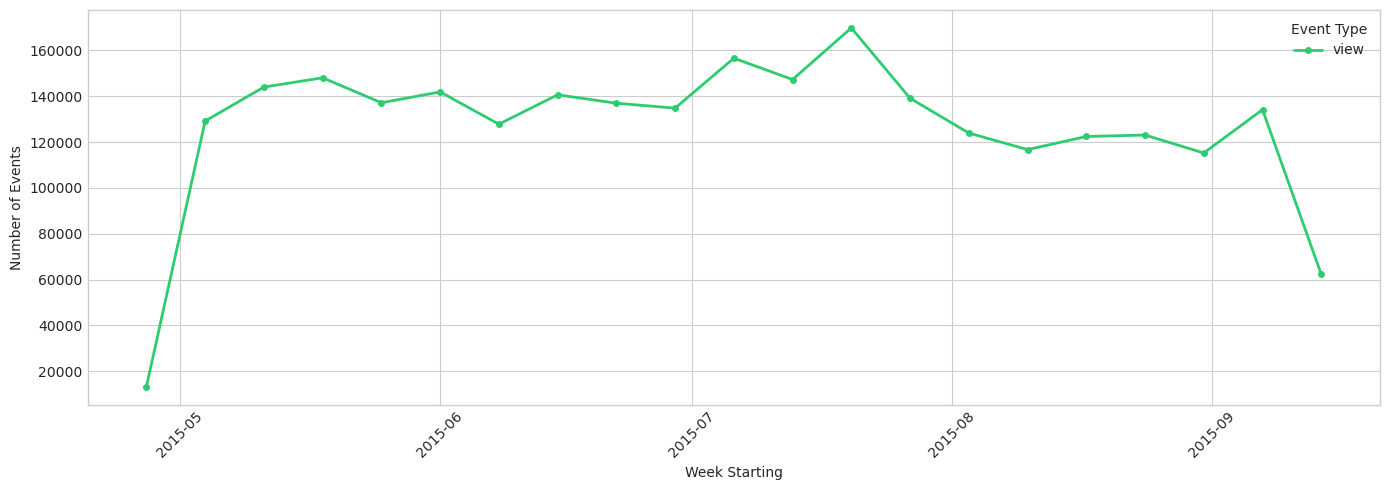

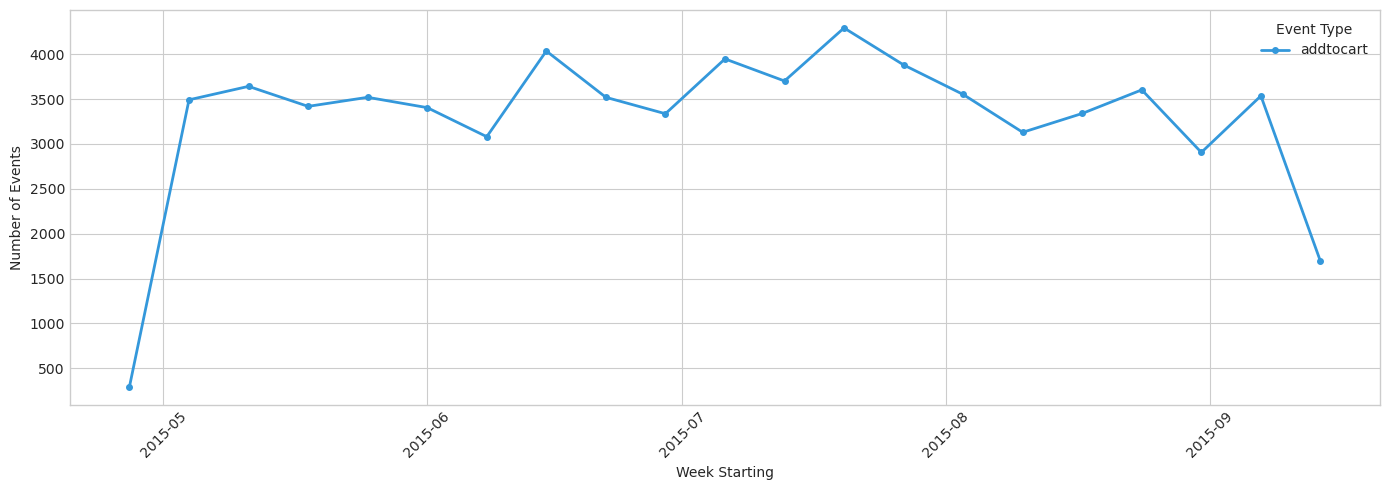

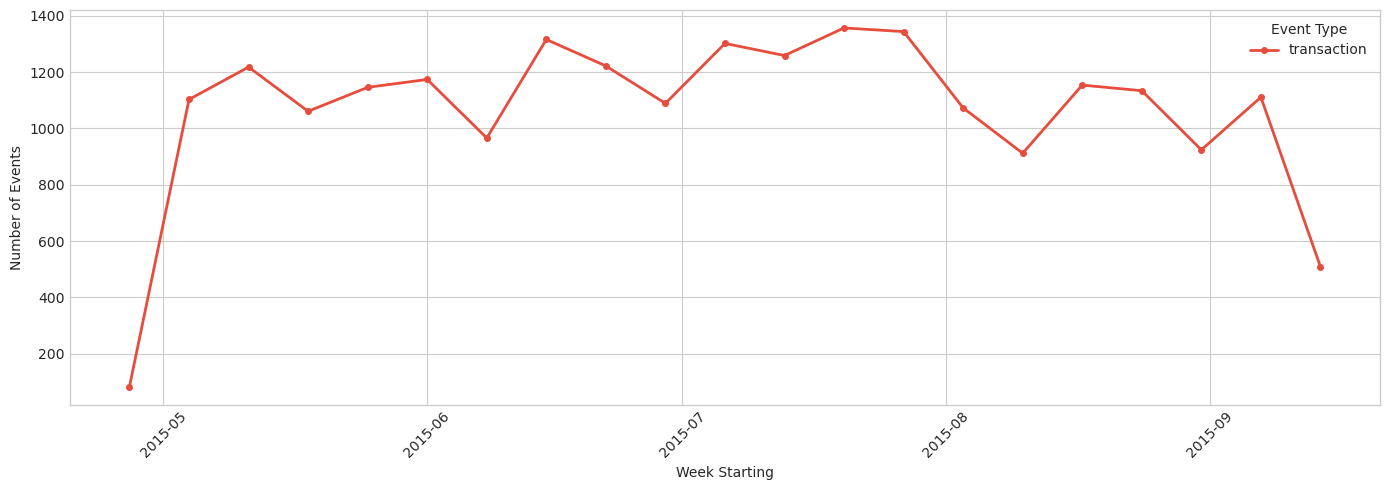

In [15]:

# Generate a separate figure for each event type
for event in event_order:
    if event in weekly_events.columns:
        fig, ax = plt.subplots(figsize=(14, 5))
        
        # Plot individual event trend
        ax.plot(
            weekly_events.index, 
            weekly_events[event], 
            marker='o', 
            markersize=4, 
            linewidth=2, 
            color=color_map[event],
            label=event
        )
        
        # Formatting
        # ax.set_title(f'Weekly {event.capitalize()} Volume Over Time', fontsize=14, fontweight='bold')
        ax.set_xlabel('Week Starting')
        ax.set_ylabel('Number of Events')
        ax.legend(title='Event Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save each figure with a unique name
        plt.savefig(f'weekly_trend_{event}.png')

#### **Day of Week Analysis**

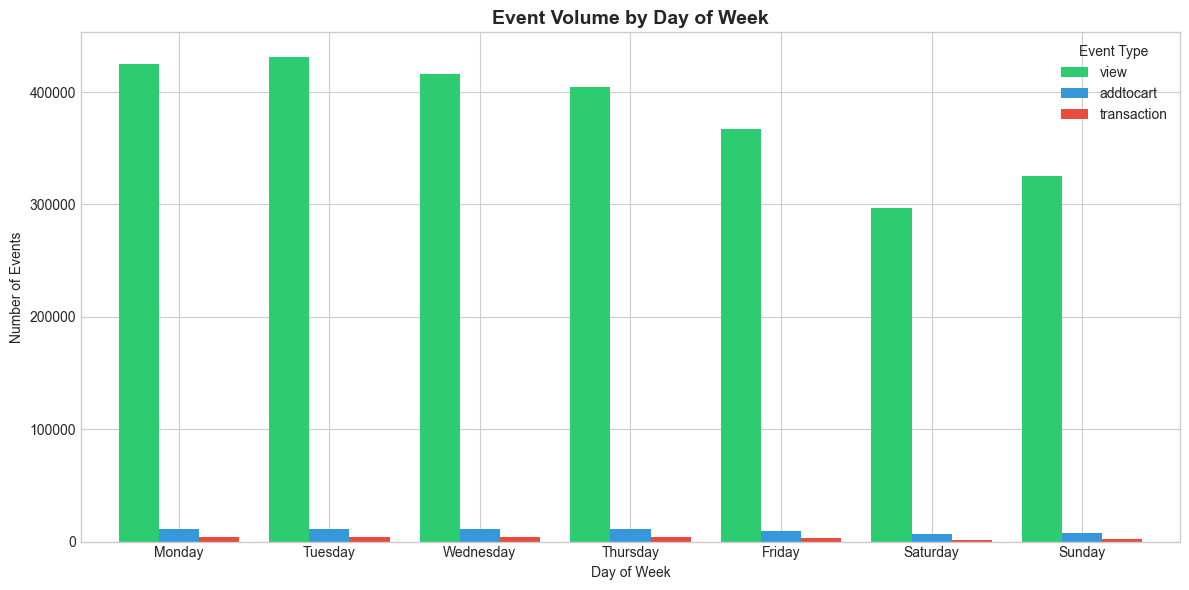

In [15]:
# ============================================
# Day of Week Analysis
# ============================================
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
event_order = ['view', 'addtocart', 'transaction']
event_colors = ['#2ecc71', '#3498db', '#e74c3c']

# Reorder columns to match event_order, keep only existing events
dow_events = events.groupby(['day_of_week', 'event']).size().unstack(fill_value=0)
dow_events = dow_events.reindex(day_order)
dow_events = dow_events[[e for e in event_order if e in dow_events.columns]]

fig, ax = plt.subplots(figsize=(12, 6))
dow_events.plot(
    kind='bar', 
    ax=ax, 
    width=0.8, 
    color=[c for e, c in zip(event_order, event_colors) if e in dow_events.columns]
)
ax.set_title('Event Volume by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Events')
ax.legend(title='Event Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **Item Properties**

#### **Distribution of properties**

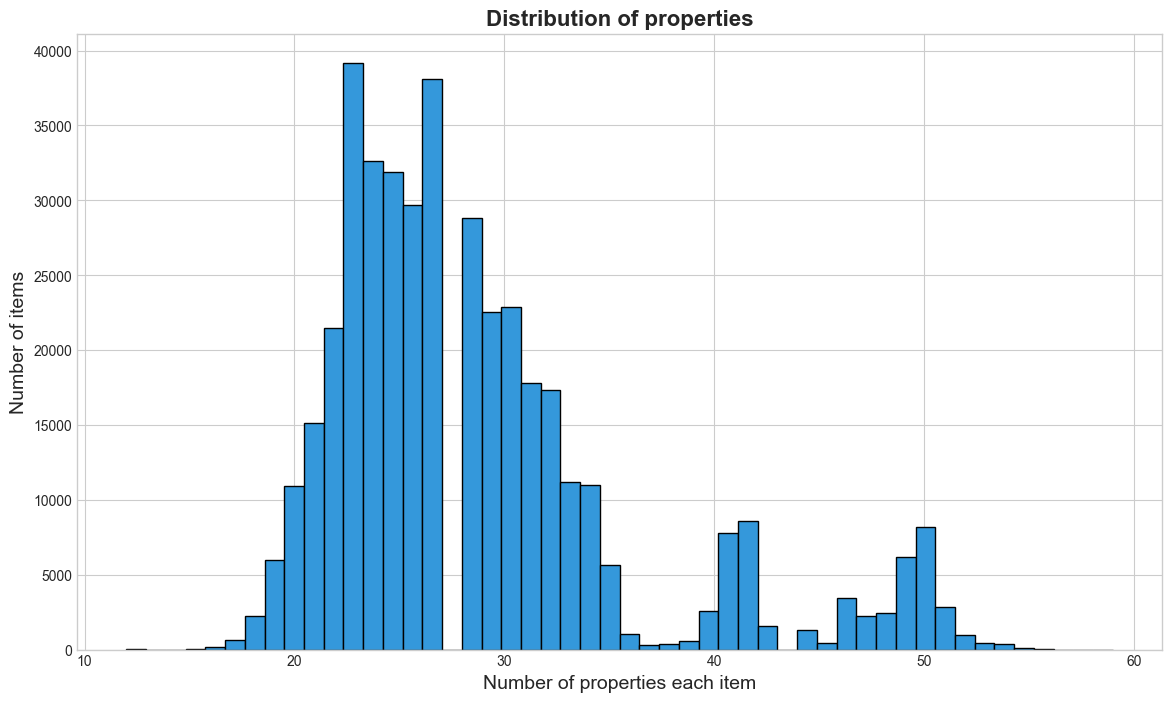

In [16]:
# số property của mỗi item
item_property_count = (
    item_properties.groupby("itemid")["property"].nunique().reset_index(name="num_properties")
)
# print(item_property_count.head())
item_property_count["num_properties"].value_counts().sort_index()
plt.figure(figsize=(14,8))
plt.hist(item_property_count["num_properties"], bins=50, color="#3498db", edgecolor="black")
plt.xlabel("Number of properties each item", fontsize=14)
plt.ylabel("Number of items", fontsize=14)
plt.title("Distribution of properties", fontweight="bold", fontsize=16)
plt.show()

#### **Explore Property Types**

In [17]:
# Top k most frequently occurring properties (removing duplicates)
def plot_top_properties(
    count_df, top_k=20, title="Top Most Common Properties", quantity=True
):
    """
    count_df: DataFrame with 2 columns: 'property' and 'count'
    top_k: number of properties to plot
    title: chart title
    """
    # Get top-k from pre-counted df
    top_df = count_df.head(top_k)
    fig, ax = plt.subplots(figsize=(14, 8))

    bars = ax.barh(
        range(len(top_df)), 
        top_df["count"], 
        color="#3498db", 
        edgecolor=None
    )
    ax.set_yticks(range(len(top_df)))
    ax.set_yticklabels(top_df["property"])
    ax.invert_yaxis()
    ax.set_xlabel("Number of Occurrences", fontsize=14)
    ax.set_ylabel("Property", fontsize=14)
    ax.set_title(title, fontsize=16, fontweight="bold")

    # Annotate value on each bar
    if quantity:
        for i, (bar, val) in enumerate(zip(bars, top_df["count"])):
            # format for readability
            if val >= 1_000_000:
                label = f"{val/1_000_000:.1f}M"
            elif val >= 1_000:
                label = f"{val/1_000:.0f}K"
            else:
                label = str(val)
            ax.text(val + max(top_df["count"])*0.01, bar.get_y() + bar.get_height()/2, label, va="center")
    
    # Print top properties index and count (like in code sample)
    print(f"\nTop {top_k} Properties:\n{top_df.set_index('property')['count']}\n")
    
    plt.tight_layout()
    plt.show()



Top 30 Properties:
property
364           417053
283           417053
available     417053
764           417053
112           417053
159           417053
categoryid    417053
888           417053
790           417053
678           417019
917           416171
202           414217
6             409065
776           407305
839           396644
227           328096
698           274747
689           211791
28            169926
928           150121
348           110602
810           103135
1036          102592
713            92762
19             74408
400            54823
243            54141
46             54141
434            54141
38             54141
Name: count, dtype: int64



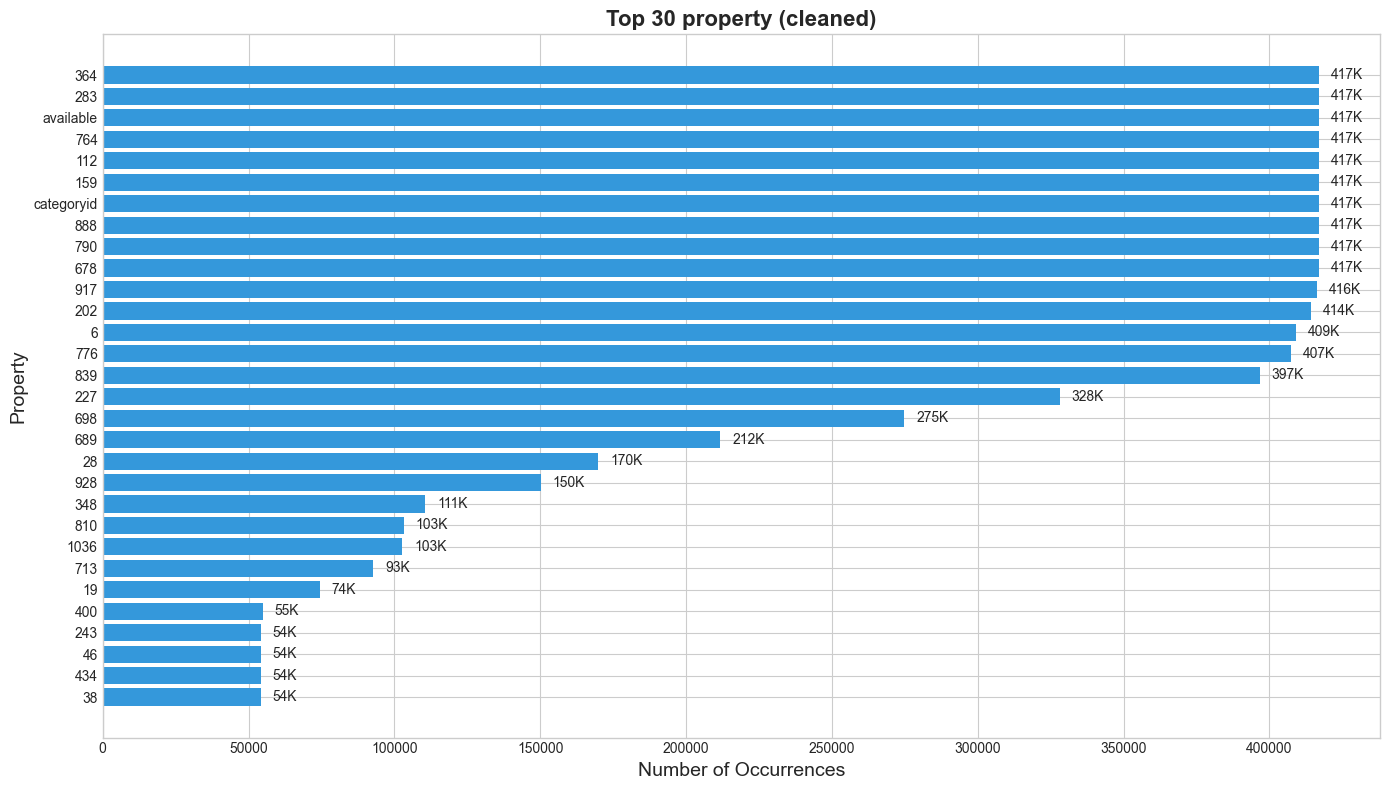

In [18]:
clean_property_df = item_properties.drop_duplicates(subset=["itemid", "property"])
property_clean_counts = (
    clean_property_df["property"]
    .value_counts()
    .reset_index()
)
plot_top_properties(property_clean_counts, top_k=30, title="Top 30 property (cleaned)", quantity=True)

#### **Category ID Analysis**


Category ID Records: 788,214
Unique Items with Category: 417,053
Unique Categories: 1,242


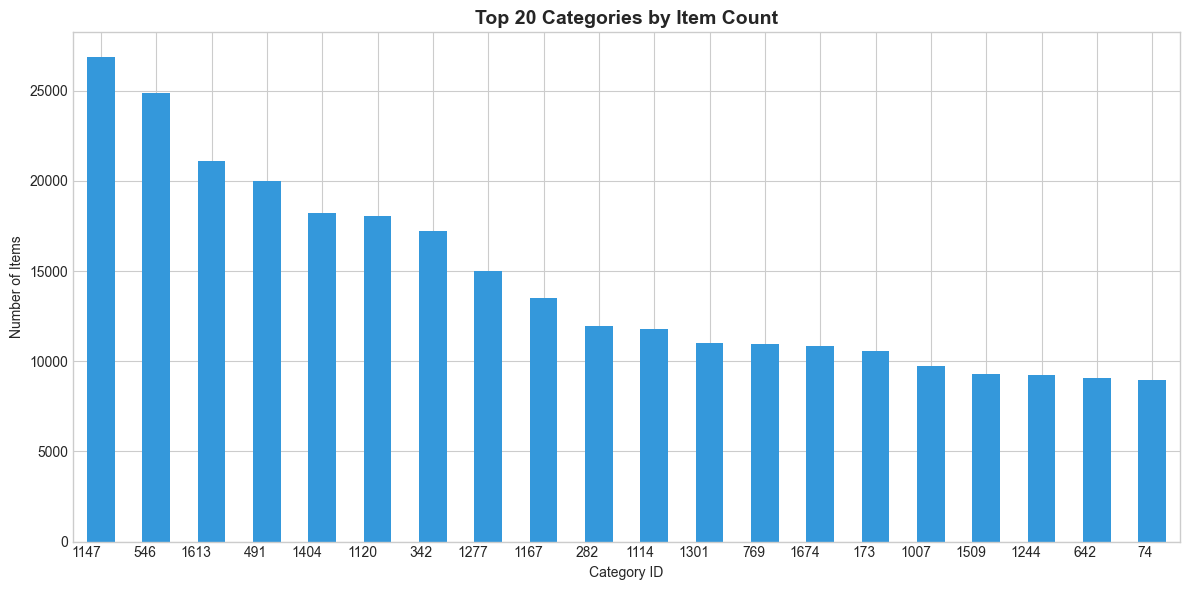

In [19]:
# ============================================
# Category ID Analysis
# ============================================
# Filter for categoryid property
category_data = item_properties[item_properties['property'] == 'categoryid'].copy()

print(f"\nCategory ID Records: {len(category_data):,}")
print(f"Unique Items with Category: {category_data['itemid'].nunique():,}")
print(f"Unique Categories: {category_data['value'].nunique():,}")

# Top categories
top_categories = category_data['value'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(12, 6))
top_categories.plot(kind='bar', ax=ax, color='#3498db')
ax.set_xlabel('Category ID')
ax.set_ylabel('Number of Items')
ax.set_title('Top 20 Categories by Item Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

#### **Item Availability Analysis**


Availability Distribution:
value
0    863086
1    640553
Name: count, dtype: int64


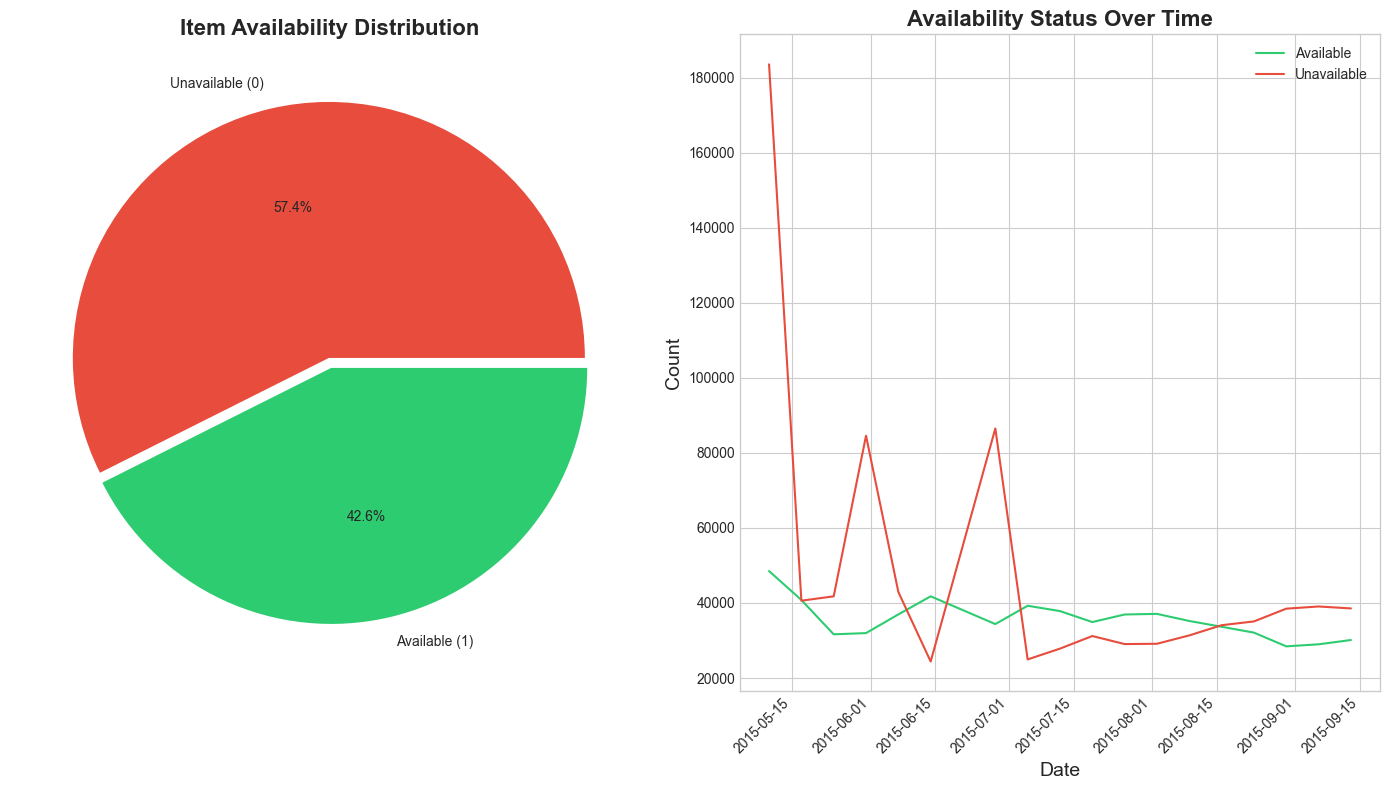

In [20]:
# ============================================
# Item Availability Analysis
# ============================================
# Filter for available property
availability_data = item_properties[item_properties['property'] == 'available'].copy()
availability_data['value'] = availability_data['value'].astype(str)

# Count available vs unavailable
avail_counts = availability_data['value'].value_counts()
print(f"\nAvailability Distribution:\n{avail_counts}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Pie chart
ax1 = axes[0]
labels_dict = {'1': 'Available (1)', '0': 'Unavailable (0)'}
labels = [labels_dict.get(str(v), str(v)) for v in avail_counts.index]
colors = ['#e74c3c', '#2ecc71']
ax1.pie(avail_counts.values, labels=labels, autopct='%1.1f%%', colors=colors[:len(avail_counts)],
        explode=[0.02]*len(avail_counts), shadow=False)
ax1.set_title('Item Availability Distribution', fontsize=16, fontweight='bold')

# Availability over time
availability_data['datetime'] = pd.to_datetime(availability_data['timestamp'], unit='ms')
availability_data['date'] = availability_data['datetime'].dt.date

# Only keep rows where "value" is 1 or 0
availability_data = availability_data[availability_data['value'].isin(['1', '0'])]

# Cast value to int for proper sorting/plotting
availability_data['value_int'] = availability_data['value'].astype(int)

# Group by date and value_int
daily_avail = availability_data.groupby(['date', 'value_int']).size().unstack(fill_value=0)
daily_avail = daily_avail.sort_index()  # Make sure dates are sorted!

ax2 = axes[1]
if 1 in daily_avail.columns:
    ax2.plot(daily_avail.index, daily_avail[1], label='Available', color='#2ecc71')
if 0 in daily_avail.columns:
    ax2.plot(daily_avail.index, daily_avail[0], label='Unavailable', color='#e74c3c')
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_title('Availability Status Over Time', fontsize=16, fontweight='bold')
ax2.legend()
for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show()

### **Recency, Frequency, Monetary (RFM) EDA**

In [21]:
import pandas as pd

def extract_numeric(value: str):
    """Extract float from 'n123.456' style strings."""
    if pd.isna(value):
        return None
    s = str(value)
    if not s.startswith('n'):
        return None
    try:
        return float(s[1:])
    except:
        return None

def build_item_price_table_from_df(
    item_properties: pd.DataFrame,
    price_property: str = '790'
) -> pd.DataFrame:
    """
    From a full item_properties DataFrame, return latest price per item
    for the given price_property (default '790').

    Returns DataFrame: ['itemid', 'price'].
    """
    # 1) Filter only rows for the price property
    price_rows = item_properties[item_properties['property'] == price_property].copy()
    if price_rows.empty:
        raise ValueError(f"No rows with property = '{price_property}' found in item_properties.")

    # 2) Convert 'value' -> numeric price
    price_rows['price'] = price_rows['value'].apply(extract_numeric)
    price_rows = price_rows.dropna(subset=['price'])

    # 3) For each item, keep the latest timestamp as the current price
    price_rows = price_rows.sort_values(['itemid', 'timestamp'])
    latest_price = (
        price_rows
        .groupby('itemid', as_index=False)
        .tail(1)[['itemid', 'price']]
        .reset_index(drop=True)
    )

    print(f"Built price table for {latest_price['itemid'].nunique():,} items.")
    return latest_price

# Usage with your already-loaded item_properties df
price_table = build_item_price_table_from_df(item_properties, price_property='790')
price_table.head()

Built price table for 417,053 items.


,itemid,price
0,0,91200.0
1,1,6120.0
2,2,41040.0
3,3,1560.0
4,4,468360.0


#### **K-means**

In [22]:
# 1) Filter transactions
transactions = events[events['event'] == 'transaction'].copy()

# 2) Merge with price table
transactions = transactions.merge(price_table, on='itemid', how='left')

# Optional: inspect coverage
price_coverage = transactions['price'].notna().mean() * 100
print(f"Transactions with price info: {price_coverage:.1f}%")

# 3) Compute line revenue (assuming quantity = 1)
transactions['revenue'] = transactions['price']

# 4) Build RFM reference date (end of events + 1 day)
reference_date = events['datetime'].max() + pd.Timedelta(days=1)

# 5) Aggregate RFM per visitor
rfm = transactions.groupby('visitorid').agg(
    Recency_days=('datetime', lambda x: (reference_date - x.max()).days),
    Frequency=('transactionid', 'nunique'),
    Monetary=('revenue', 'sum')
).reset_index()

print("RFM head:")
print(rfm.head())
print("\nRFM summary:")
print(rfm.describe())

Transactions with price info: 97.9%
RFM head:
   visitorid  Recency_days  Frequency  Monetary
0        172            35          1  124440.0
1        186            37          1   63000.0
2        264            11          1   95136.0
3        419            51          1   17160.0
4        539            94          1   41040.0

RFM summary:
          visitorid  Recency_days     Frequency      Monetary
count  1.171900e+04  11719.000000  11719.000000  1.171900e+04
mean   7.099856e+05     70.862872      1.507978  2.228542e+05
std    4.058287e+05     39.089067      7.344491  1.246120e+06
min    1.720000e+02      1.000000      1.000000  0.000000e+00
25%    3.591195e+05     38.000000      1.000000  2.868000e+04
50%    7.183140e+05     71.000000      1.000000  6.444000e+04
75%    1.062739e+06    105.000000      1.000000  1.890600e+05
max    1.407398e+06    138.000000    502.000000  7.958074e+07


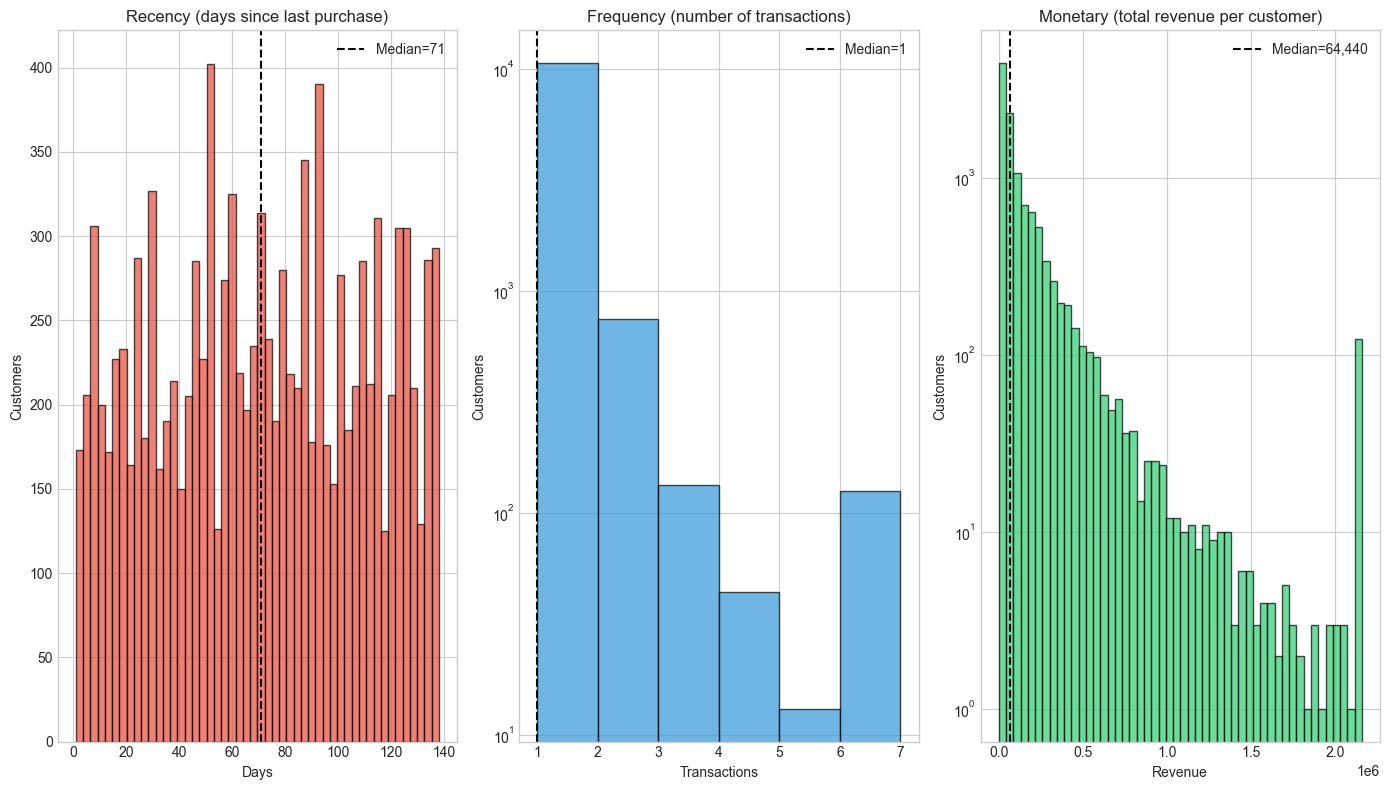

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 3, figsize=(14, 8))

# Recency
ax = axes[0]
ax.hist(rfm['Recency_days'], bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
median_recency = rfm['Recency_days'].median()
ax.axvline(median_recency, color='black', linestyle='--',
           label=f"Median={median_recency:.0f}")
ax.set_title('Recency (days since last purchase)')
ax.set_xlabel('Days')
ax.set_ylabel('Customers')
ax.legend()

# Frequency (clip high tail for visualization)
ax = axes[1]
freq_for_plot = rfm['Frequency'].clip(upper=rfm['Frequency'].quantile(0.99))
ax.hist(freq_for_plot, bins=range(1, int(freq_for_plot.max())+2),
        color='#3498db', edgecolor='black', alpha=0.7)
ax.set_yscale('log')
median_freq = freq_for_plot.median()
ax.axvline(median_freq, color='black', linestyle='--',
           label=f"Median={median_freq:.0f}")
ax.set_title('Frequency (number of transactions)')
ax.set_xlabel('Transactions')
ax.set_ylabel('Customers')
ax.legend()

# Monetary (clip high tail)
ax = axes[2]
mon_for_plot = rfm['Monetary'].clip(upper=rfm['Monetary'].quantile(0.99))
ax.hist(mon_for_plot, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
ax.set_yscale('log')
median_mon = mon_for_plot.median()
ax.axvline(median_mon, color='black', linestyle='--',
           label=f"Median={median_mon:,.0f}")
ax.set_title('Monetary (total revenue per customer)')
ax.set_xlabel('Revenue')
ax.set_ylabel('Customers')
ax.legend()

plt.tight_layout()
plt.show()

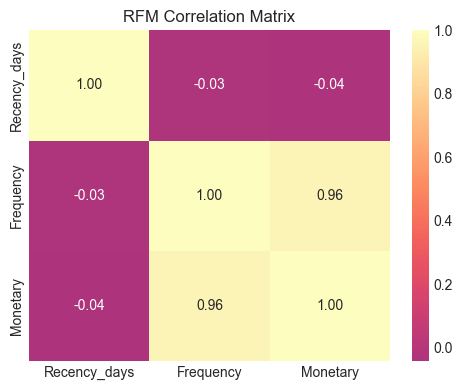

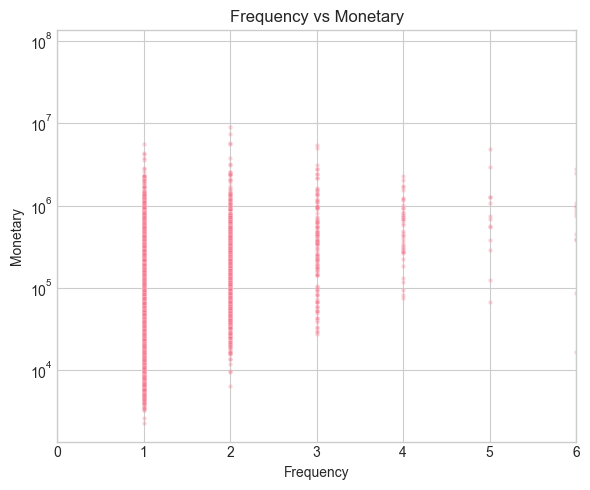

In [24]:
# Correlation matrix
corr = rfm[['Recency_days', 'Frequency', 'Monetary']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='magma', center=0, fmt='.2f')
plt.title('RFM Correlation Matrix')
plt.tight_layout()
plt.show()

# Frequency vs Monetary (log scale helps)
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    alpha=0.3,
    s=10
)
plt.yscale('log')
plt.xlim(0, rfm['Frequency'].quantile(0.99))
plt.title('Frequency vs Monetary')
plt.tight_layout()
plt.show()

#### **Customer Lifetime Value**

In [25]:
# 1) Filter transactions (already filtered earlier as 'transactions')

# 2) Use the same reference_date as before (end of events + 1 day)
reference_date = events['datetime'].max() + pd.Timedelta(days=1)

# 3) Prepare summary for CLV modeling (lifetimes style)
summary_for_clv = transactions.groupby('visitorid').agg(
    frequency=('transactionid', lambda x: x.nunique() - 1),  # # of repeat transactions per customer
    recency=('datetime', lambda x: (x.max() - x.min()).days), # time between first and last purchase per customer
    T=('datetime', lambda x: (reference_date - x.min()).days), # time between first purchase and reference
    monetary_value=('revenue', 'mean') # avg order value for each customer
).reset_index()

# lifetimes requires frequency > 0 (must have had repeat transactions)
summary_for_clv = summary_for_clv[summary_for_clv['frequency'] > 0]
print("RFM head:")
print(summary_for_clv.head())
print("\nRFM summary:")
print(summary_for_clv.describe())


RFM head:
    visitorid  frequency  recency    T  monetary_value
32       3926          1       14  108         31440.0
40       4537          1        0   12         77988.0
44       5042          2        0   68         48080.0
58       6699          3        0  134         56220.0
71       8043          1        3   32         29880.0

RFM summary:
          visitorid    frequency      recency            T  monetary_value
count  1.063000e+03  1063.000000  1063.000000  1063.000000    1.045000e+03
mean   7.288141e+05     5.600188    11.522107    80.308561    1.331559e+05
std    3.978577e+05    23.804229    23.647745    39.245531    1.985135e+05
min    3.926000e+03     1.000000     0.000000     1.000000    3.240000e+03
25%    3.843185e+05     1.000000     0.000000    50.000000    3.204000e+04
50%    7.567160e+05     1.000000     0.000000    85.000000    8.220000e+04
75%    1.060934e+06     2.000000    10.500000   115.000000    1.561831e+05
max    1.406087e+06   501.000000   127.000000 

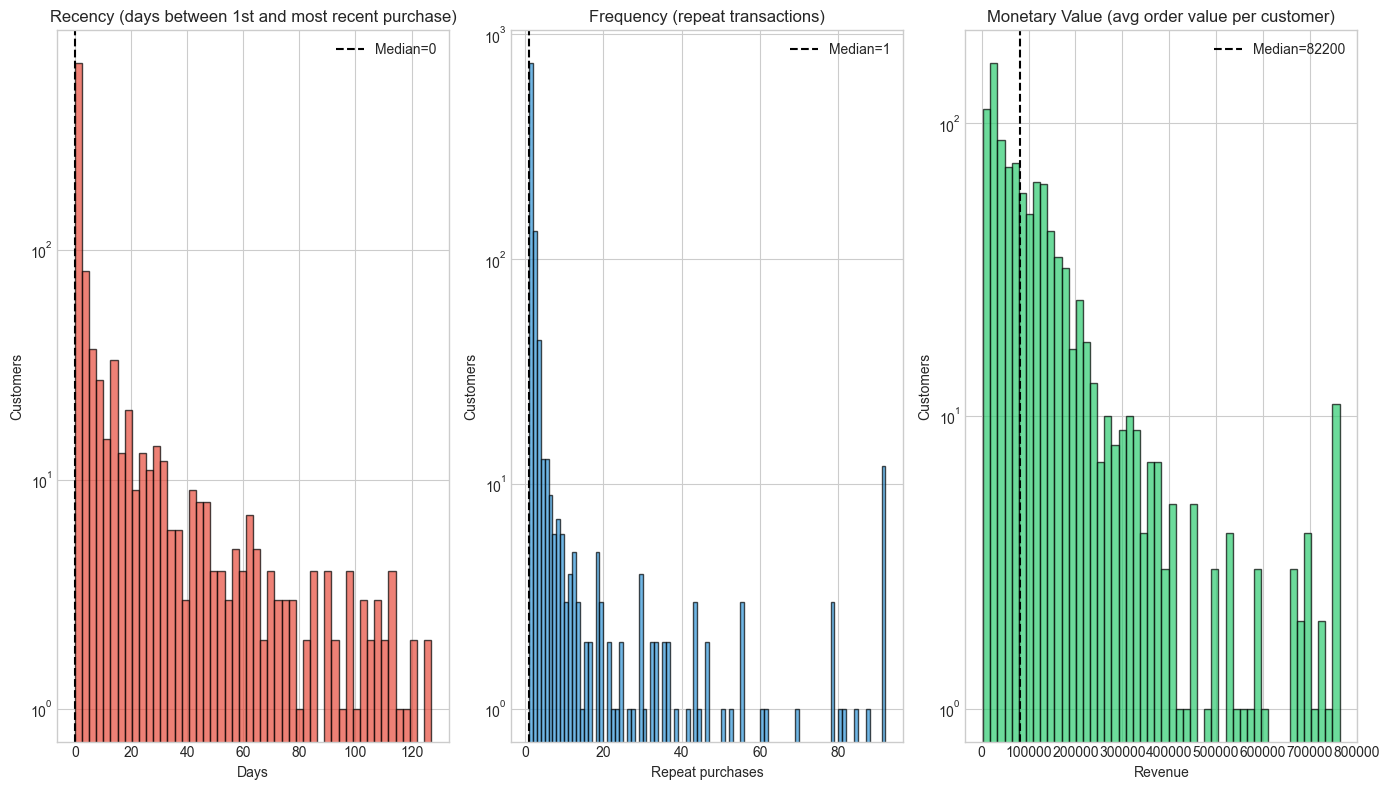

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 3, figsize=(14, 8))

# Recency (for CLV, use summary_for_clv['recency'])
ax = axes[0]
recency = summary_for_clv['recency']
ax.hist(recency, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
ax.set_yscale('log')
ax.set_title('Recency (days between 1st and most recent purchase)')
ax.set_xlabel('Days')
ax.set_ylabel('Customers')
median_recency = recency.median()
ax.axvline(median_recency, color='black', linestyle='--',
           label=f"Median={median_recency:.0f}")
ax.legend()

# Frequency (for CLV; # of repeat purchases, min=1)
ax = axes[1]
freq_for_plot = summary_for_clv['frequency'].clip(upper=summary_for_clv['frequency'].quantile(0.99))
ax.hist(freq_for_plot, 
        bins=range(int(freq_for_plot.min()), int(freq_for_plot.max())+2),
        color='#3498db', edgecolor='black', alpha=0.7)
ax.set_yscale('log')
ax.set_title('Frequency (repeat transactions)')
ax.set_xlabel('Repeat purchases')
ax.set_ylabel('Customers')
median_freq = freq_for_plot.median()
ax.axvline(median_freq, color='black', linestyle='--',
           label=f"Median={median_freq:.0f}")
ax.legend()

# Monetary Value (for CLV, mean order value per customer)
ax = axes[2]
mon_for_plot = summary_for_clv['monetary_value'].clip(upper=summary_for_clv['monetary_value'].quantile(0.99))
ax.hist(mon_for_plot, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
ax.set_yscale('log')
ax.set_title('Monetary Value (avg order value per customer)')
ax.set_xlabel('Revenue')
ax.set_ylabel('Customers')
median_monetary = mon_for_plot.median()
ax.axvline(median_monetary, color='black', linestyle='--',
           label=f"Median={median_monetary:.0f}")
ax.legend()

plt.tight_layout()
plt.show()

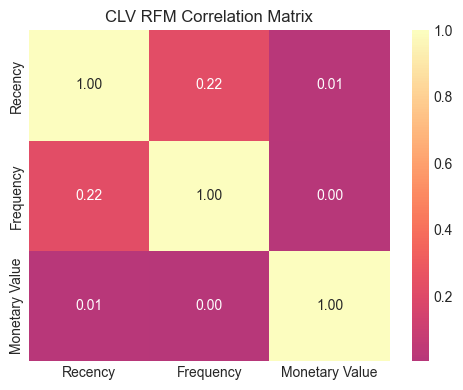

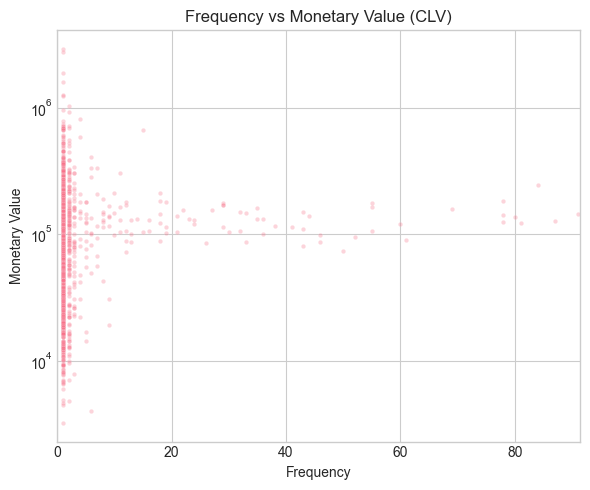

In [27]:
# Correlation matrix for CLV RFM dataframe (summary_for_clv)
clv_corr = summary_for_clv[['recency', 'frequency', 'monetary_value']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(clv_corr, annot=True, cmap='magma', center=0, fmt='.2f',
            xticklabels=['Recency', 'Frequency', 'Monetary Value'],
            yticklabels=['Recency', 'Frequency', 'Monetary Value'])
plt.title('CLV RFM Correlation Matrix')
plt.tight_layout()
plt.show()

# Frequency vs Monetary Value (log scale helps) for CLV RFM
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=summary_for_clv,
    x='frequency',
    y='monetary_value',
    alpha=0.3,
    s=10
)
plt.yscale('log')
plt.xlim(0, summary_for_clv['frequency'].quantile(0.99))
plt.title('Frequency vs Monetary Value (CLV)')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.tight_layout()
plt.show()